In [0]:
pip install image-classifiers

In [0]:
pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-krgcoqrx
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-krgcoqrx
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-fo1yt8e8/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
import keras
from classification_models.resnet import ResNet18, preprocess_input


n_classes = 10

# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

# train
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()

Using TensorFlow backend.
W0710 17:09:28.627959 140622356121472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 17:09:28.662534 140622356121472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 17:09:28.663642 140622356121472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0710 17:09:28.664940 140622356121472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0

In [0]:
from __future__ import print_function
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train,
              batch_size=32,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=False)


scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

W0710 17:09:33.318213 140622356121472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 105s 2ms/step - loss: 0.9896 - acc: 0.6593 - val_loss: 0.7127 - val_acc: 0.7537
Epoch 2/5
50000/50000 [==============================] - 100s 2ms/step - loss: 0.5569 - acc: 0.8086 - val_loss: 0.6563 - val_acc: 0.7752
Epoch 3/5
50000/50000 [==============================] - 101s 2ms/step - loss: 0.3132 - acc: 0.8976 - val_loss: 0.7388 - val_acc: 0.7706
Epoch 4/5
50000/50000 [==============================] - 101s 2ms/step - loss: 0.1363 - acc: 0.9619 - val_loss: 0.8944 - val_acc: 0.7704
Epoch 5/5
10000/10000 [==============================] - 5s 518us/step
Test loss: 0.9532998979568481
Test accuracy: 0.7814


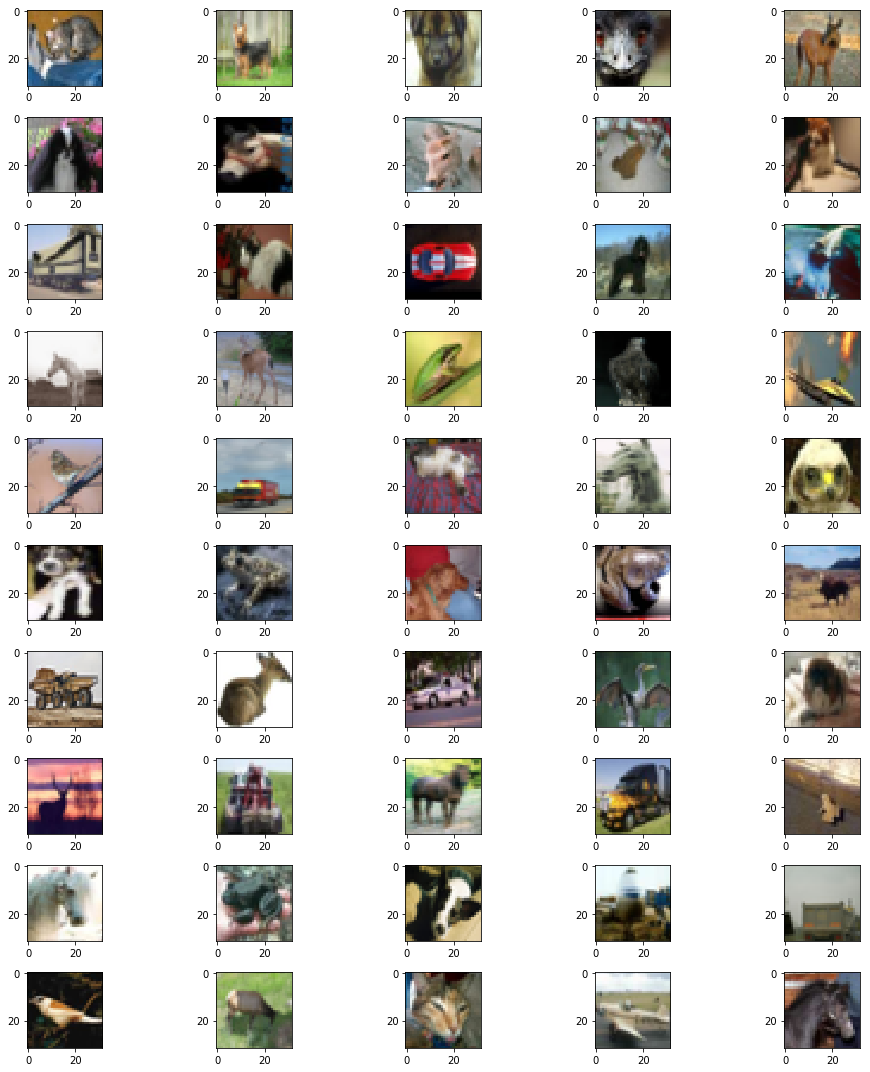

In [0]:
import matplotlib.pyplot as plt
import numpy as np  


pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)


mis_class=[]

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==50):
        break        
        
        
count=0
fig,ax=plt.subplots(10,5)
fig.set_size_inches(15,15)
for i in range (10):
    for j in range (5):
        ax[i,j].imshow(x_test[mis_class[count]])
        
        plt.tight_layout()
        count+=1        

W0710 20:39:28.067994 140622356121472 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0710 20:39:37.501168 140622356121472 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0710 20:39:46.741003 140622356121472 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0710 20:39:56.207226 140622356121472 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0710 20:40:05.505984 140622356121472 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0710 20:40:14.871556 140622356121472 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0710 20:40:24.410588 140622

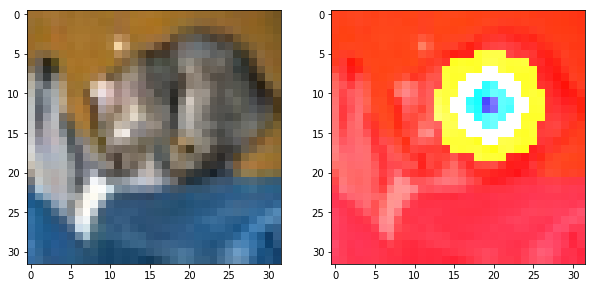

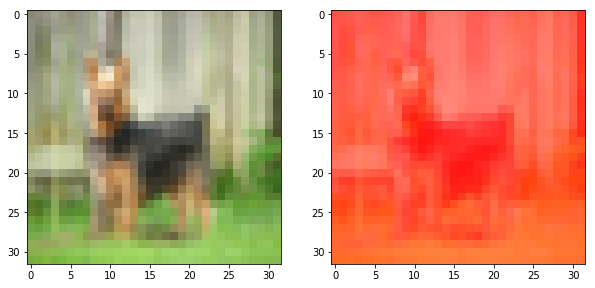

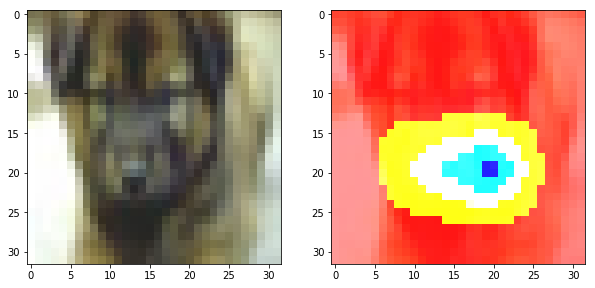

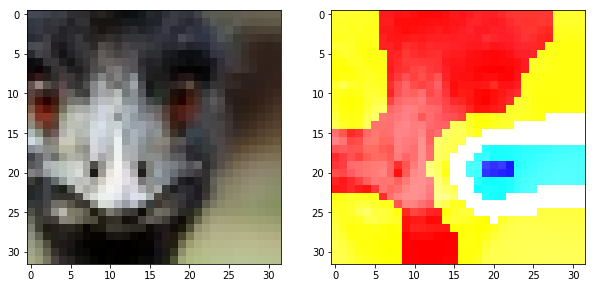

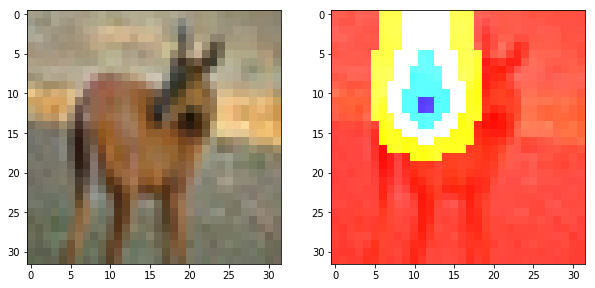

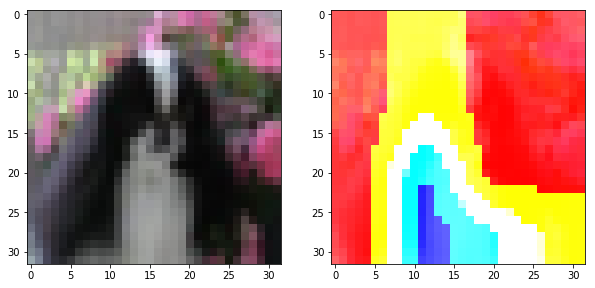

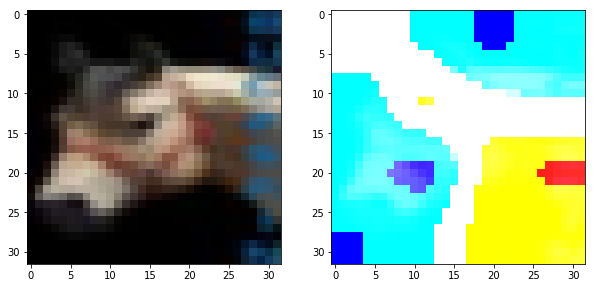

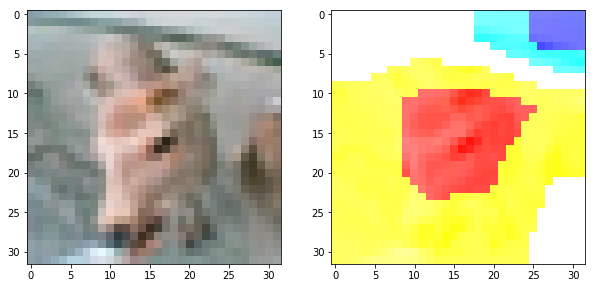

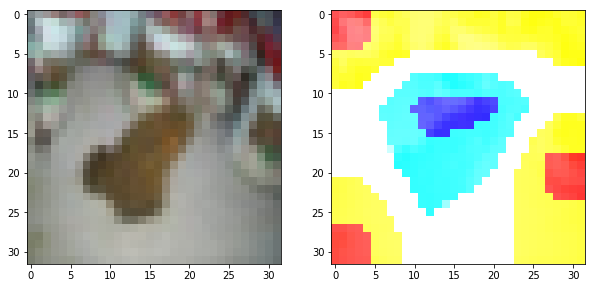

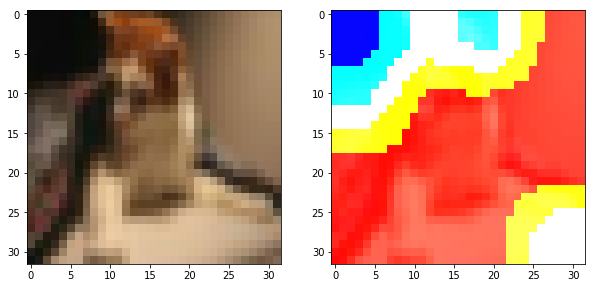

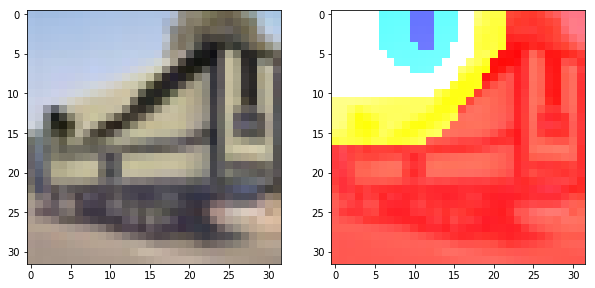

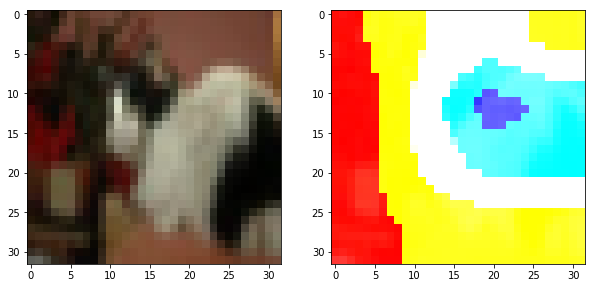

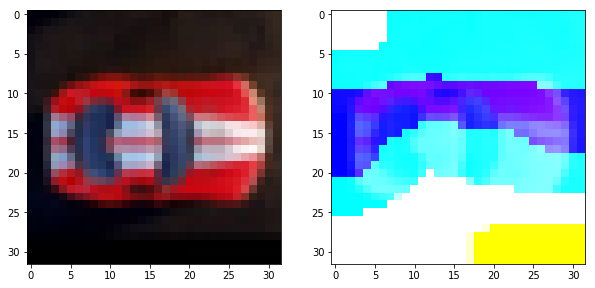

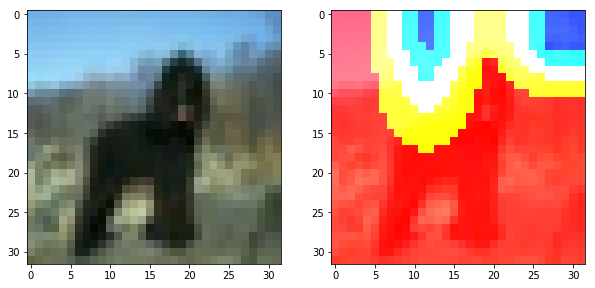

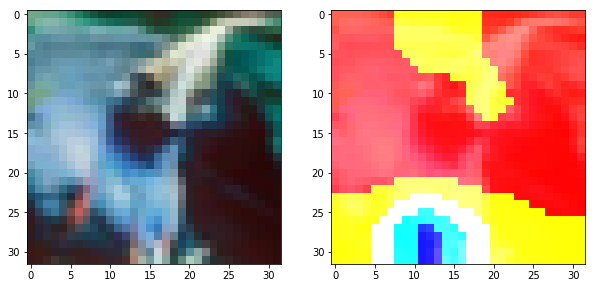

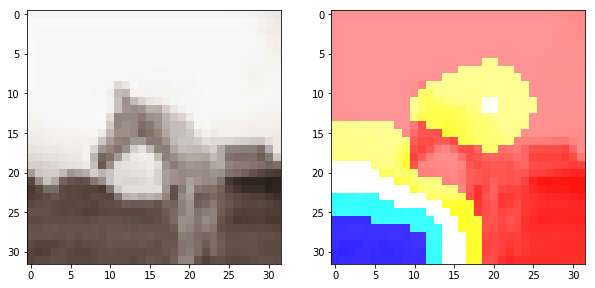

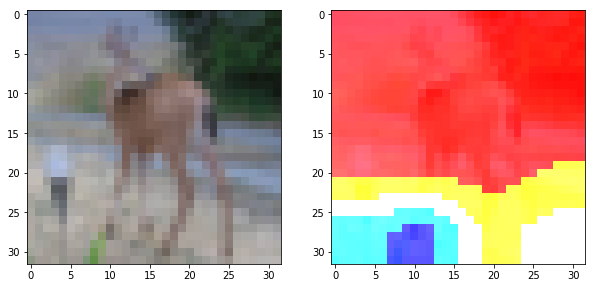

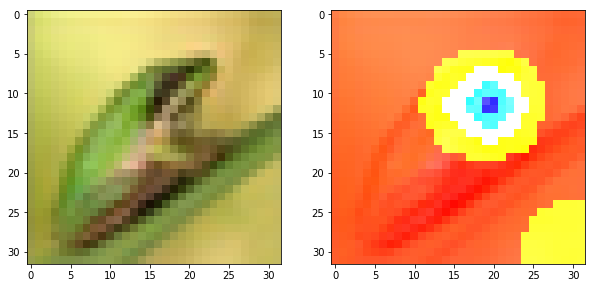

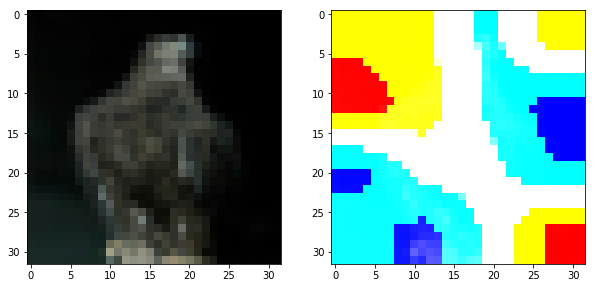

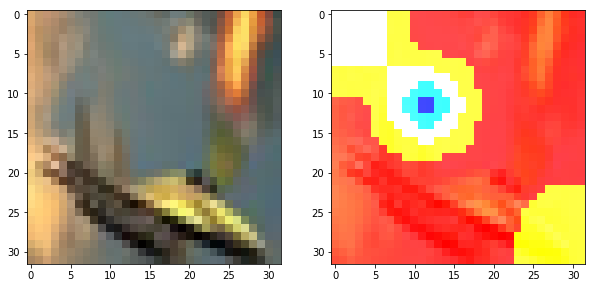

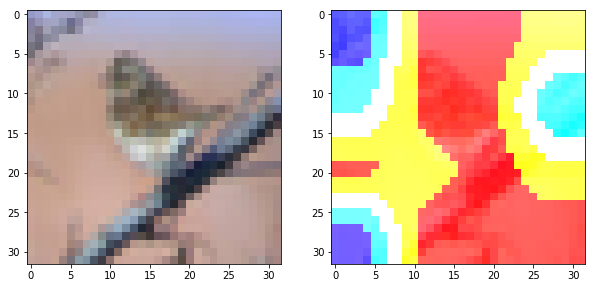

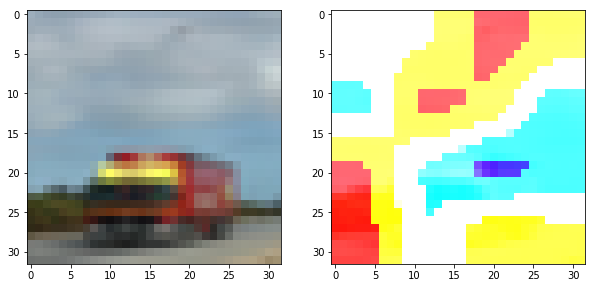

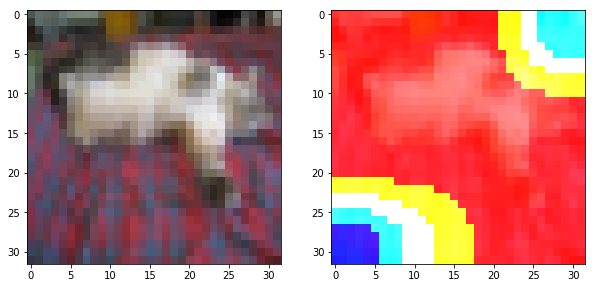

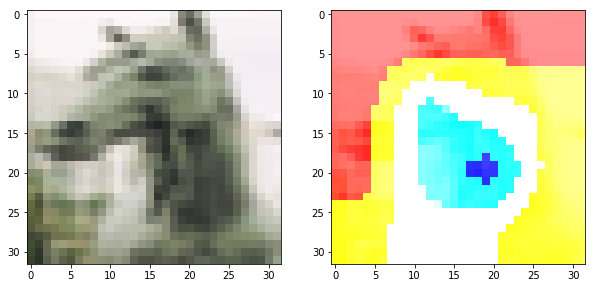

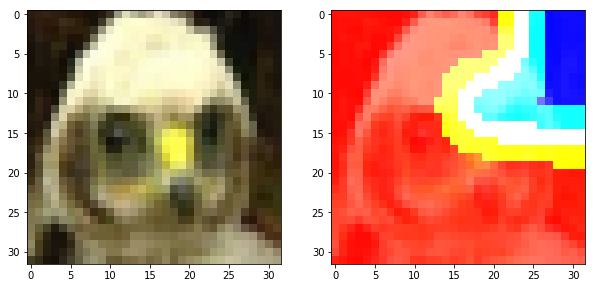

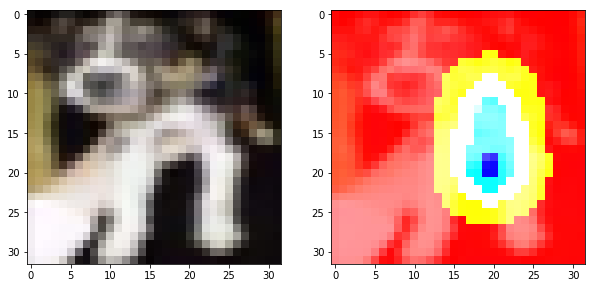

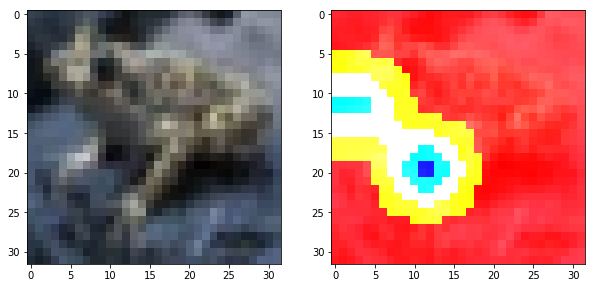

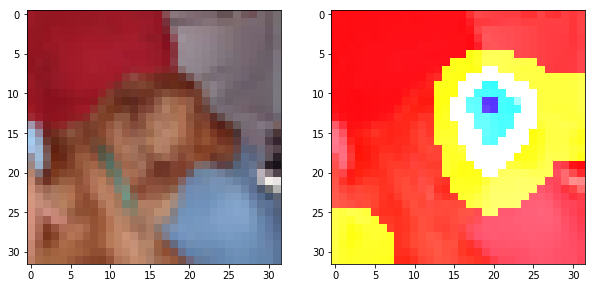

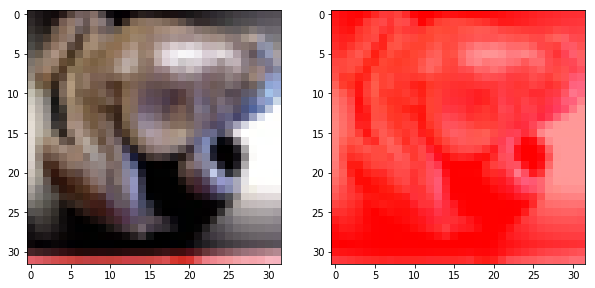

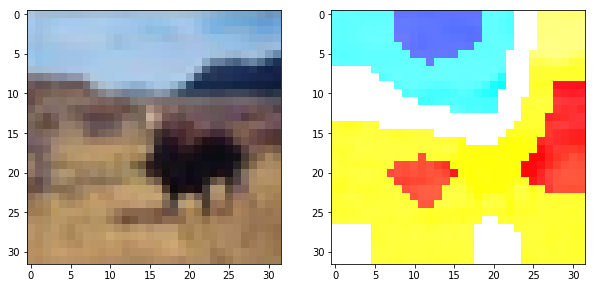

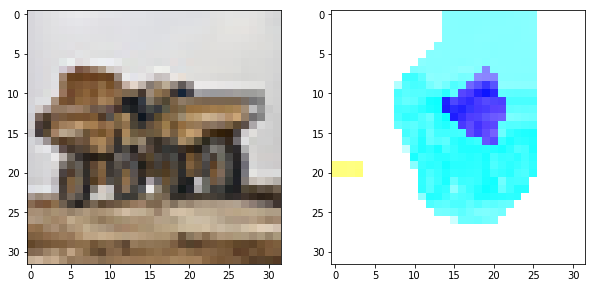

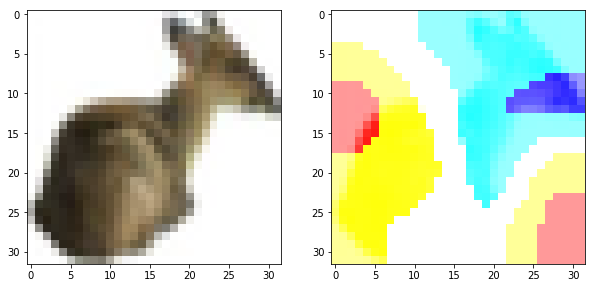

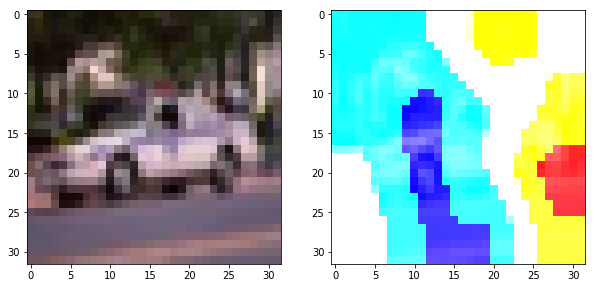

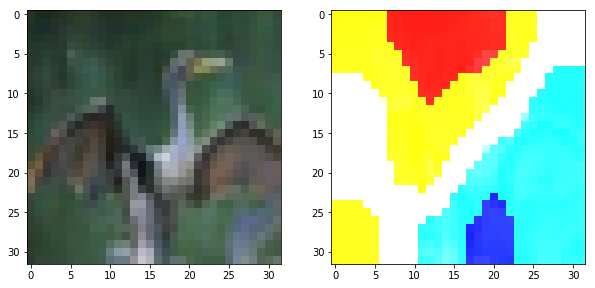

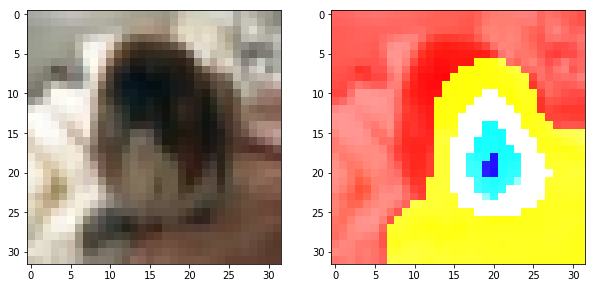

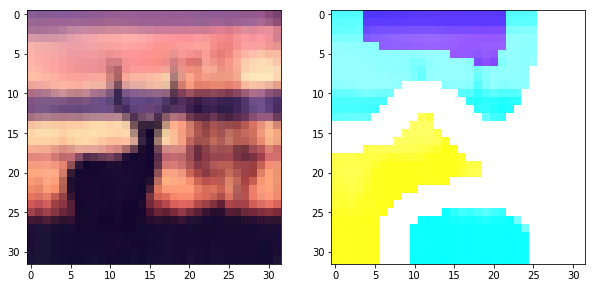

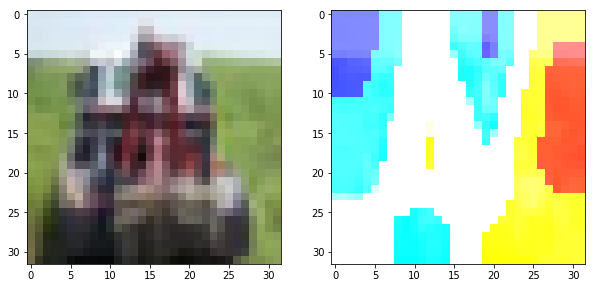

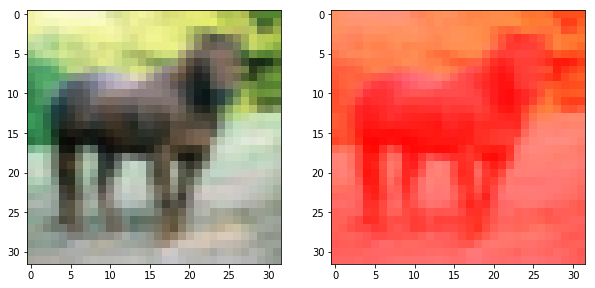

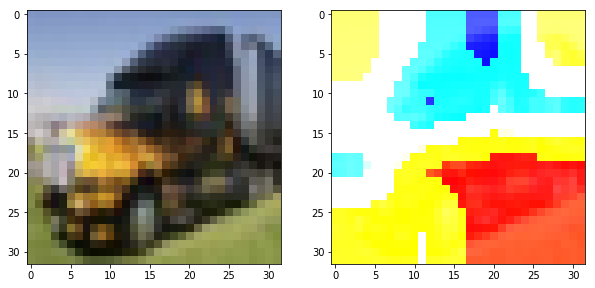

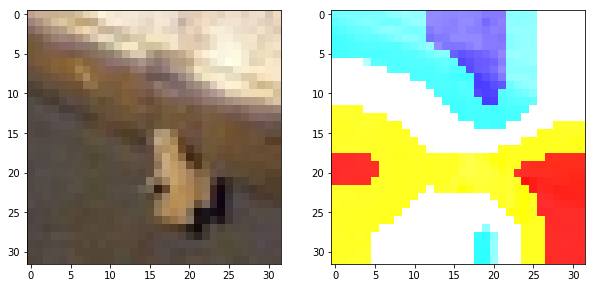

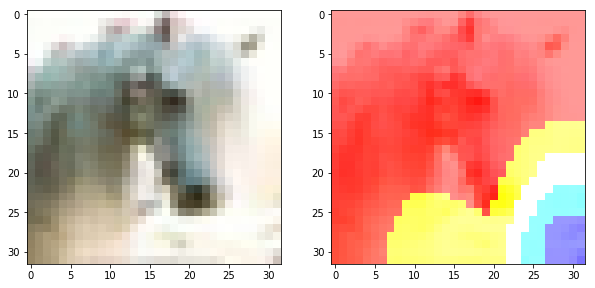

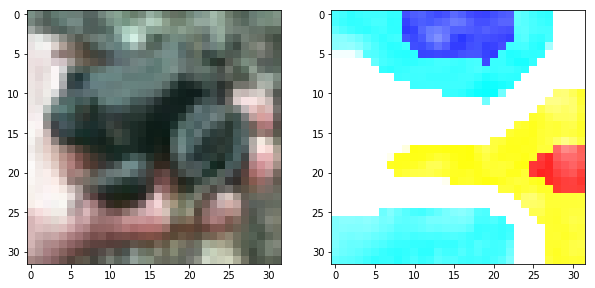

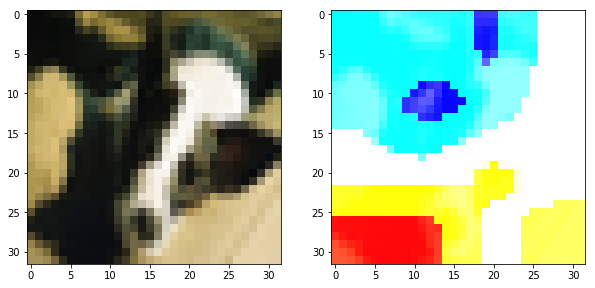

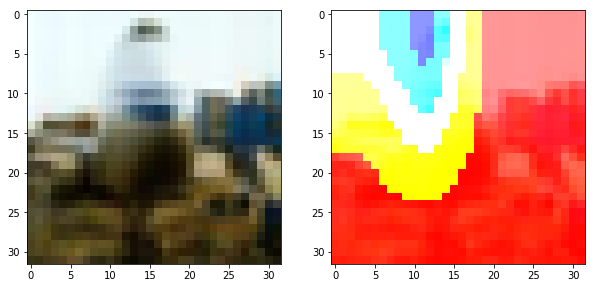

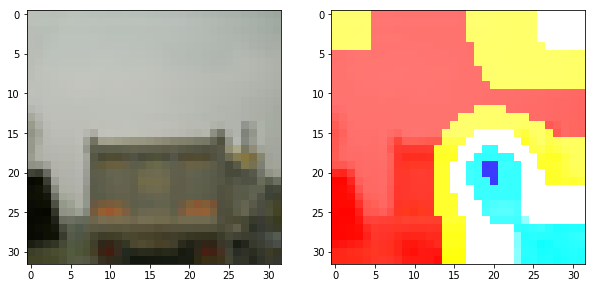

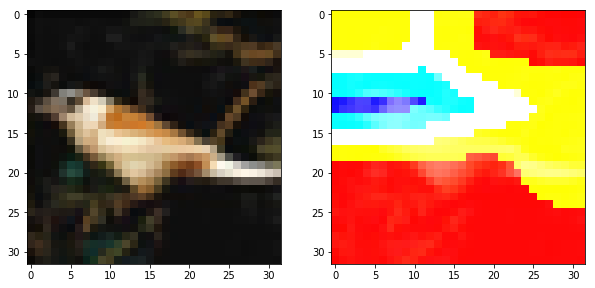

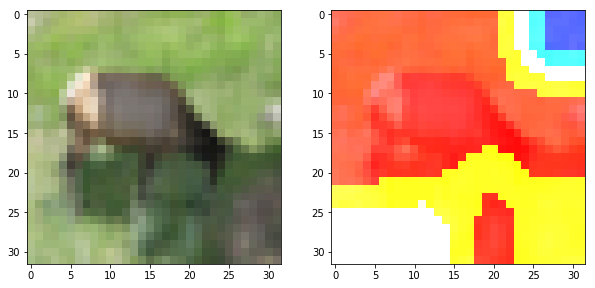

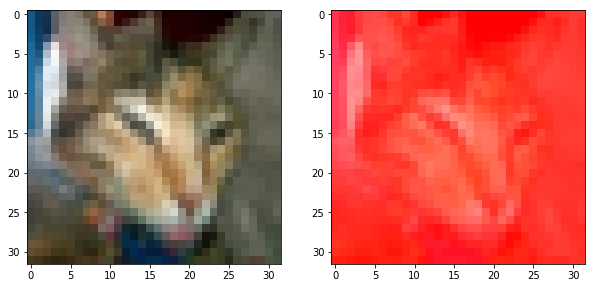

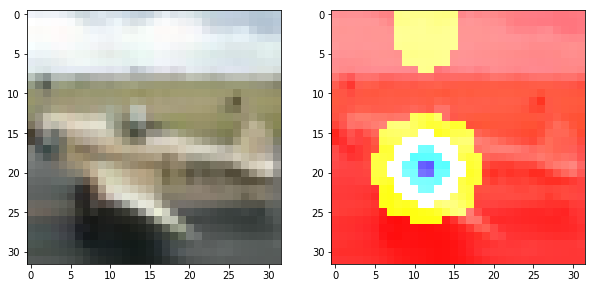

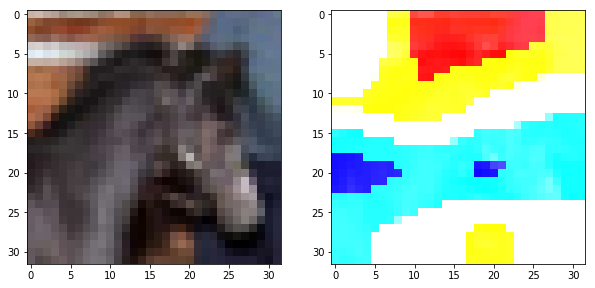

In [0]:
import keras.backend as K
from keras.preprocessing import image
import cv2
from google.colab.patches import cv2_imshow

for k in range(50):

    img = x_test[mis_class[k]]
    x1 = image.img_to_array(img)
    x1 = np.expand_dims(x1, axis=0)
    x1 = preprocess_input(x1)

    preds = model.predict(x1)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer("stage2_unit2_conv1") 


    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x1])
    for i in range(128):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)


    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0, dtype = cv2.CV_32F)

    fig,ax=plt.subplots(1,2)
    fig.set_size_inches(10,10)
    ax[0].imshow(img)
    ax[1].imshow(superimposed_img)


